In [1]:
import h5py

/net/lofar1/data1/albert/miniconda3/envs/kerastf/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [17]:
with h5py.File('../../scripts/data/killms_datapack_2.hdf5') as f, h5py.File('../../scripts/data/killms_datapack_3.hdf5') as g:
    g['/sol000/tec000/val'][...] = f['/sol000/tec000/val'][...]
    g['/sol000/tec000/weight'][...] = f['/sol000/tec000/weight'][...]

In [1]:
from bayes_tec.bayes_opt.maximum_likelihood_tec import solve_ml_tec
from bayes_tec.datapack import DataPack
import numpy as np

/net/lofar1/data1/albert/miniconda3/envs/kerastf/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [46]:
with DataPack('../../scripts/data/killms_datapack_2.hdf5',readonly=True) as datapack:#'/home/albert/git/IonoTomo/src/ionotomo/data/NsolutionsDDE_2.5Jy_tecandphasePF_correctedlosoto_fulltime_dec27.h5',readonly=True) as datapack:
    datapack.switch_solset('posterior_sol')
    datapack.select(ant="RS*",time=slice(1,1000,1),pol=slice(0,1,1))
    tec, _ = datapack.tec
    datapack.switch_solset('sol000')
    phase, axes = datapack.phase
    
    tec_ml, _ = datapack.tec
    
    patch_names,directions = datapack.get_sources(axes['dir'])
    _, freqs = datapack.get_freqs(axes['freq'])
    _, times = datapack.get_times(axes['time'])
print(axes)
Nf = len(freqs)
Nt = len(times)
# phase_ = phase.transpose((0,1,2,4,3)).reshape((-1,Nf))
# tec_, sigma_ = solve_ml_tec(phase_,freqs,batch_size=int(1e6),max_tec=0.6,n_iter=30,K=3,t=2.)

2018-09-24 10:33:16,721 Appending to /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-09-24 10:33:16,735 Closing table.
2018-09-24 10:33:16,741 Reading from /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-09-24 10:33:18,341 Closing table.
{'pol': array(['XX'], dtype='<U2'), 'dir': array(['Dir00', 'Dir01', 'Dir02', 'Dir03', 'Dir04', 'Dir05', 'Dir06',
       'Dir07', 'Dir08', 'Dir09', 'Dir10', 'Dir11', 'Dir12', 'Dir13',
       'Dir14', 'Dir15', 'Dir16', 'Dir17', 'Dir18', 'Dir19', 'Dir20',
       'Dir21', 'Dir22', 'Dir23', 'Dir24', 'Dir25', 'Dir26', 'Dir27',
       'Dir28', 'Dir29', 'Dir30', 'Dir31', 'Dir32', 'Dir33', 'Dir34',
       'Dir35', 'Dir36', 'Dir37', 'Dir38', 'Dir39', 'Dir40', 'Dir41',
       'Dir42', 'Dir43', 'Dir44'], dtype='<U5'), 'ant': array(['RS106HBA', 'RS205HBA', 'RS208HBA', 'RS210HBA', 'RS305HBA',
       'RS306HBA', 'RS307HBA', 'RS310HBA', 'RS406HBA', 'RS407HBA',
       'RS409HBA', 'RS503HBA', 'RS508HBA', 

In [47]:
Npol,Nd, Na,Nf,Nt = phase.shape
# tec = tec_.reshape((Npol,Nd,Na,Nt))
# sigma = sigma_.reshape((Npol, Nd, Na, Nt))

def wrap(phi):
    return np.angle(np.exp(1j*phi))

# phase_pred = -8.448e9*tec[...,None,:]/freqs[:,None]
# res = (wrap(wrap(phase) - wrap(phase_pred)))
res = tec - tec_ml

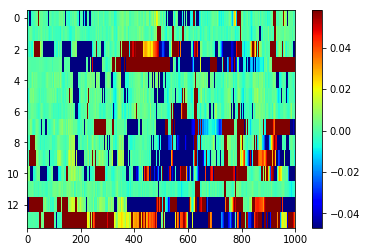

In [48]:
import numpy as np
import pylab as plt

import mpl_toolkits.mplot3d.axes3d as p3







# for l in range(Nt):
    
#     z = phase_pred[0,0,51,:,l]
#     x = times[l].mjd*np.ones(Nf)
#     y = freqs
# #     ax.scatter(x,y,z,c=plt.cm.jet(l/30),marker='+',alpha=0.5)
#     ax.plot(x,y,z,c='k',alpha=0.5)
#     ax.set_xlabel('times (mjd)')
#     ax.set_ylabel('frequency Hz')
#     ax.set_zlabel('phase (rad)')
# #     ax.set_zlim3d([-np.pi,np.pi])

# norm = plt.Normalize(res[0,0,51,:,:].min(),res[0,0,51,:,:].max())
norm = plt.Normalize(np.percentile(res,10),np.percentile(res,90))

c = plt.cm.jet(norm(res[0,0,:,:]))
plt.imshow(res[0,0,:,:], cmap=plt.cm.jet,norm=norm,aspect='auto')
plt.colorbar()
plt.show()

# fig = plt.figure(figsize=(12,12))
# ax = p3.Axes3D(fig)

    
# for l in range(Nf):
#     z = res[0,0,51,l,:]
#     x = times.mjd
#     y = freqs[l]*np.ones(Nt)
#     ax.plot(x,y,z,c='k',marker='+',alpha=0.9)
#     c = plt.cm.jet(norm(z))    
#     ax.scatter(x,y,z,c=c,alpha=0.5)
    
#     ax.set_xlabel('times (mjd)')
#     ax.set_ylabel('frequency Hz')
#     ax.set_zlabel('phase (rad)')
#     ax.set_zlim3d([-np.pi,np.pi])
# plt.show()
# plt.hist(res.flatten(),bins=100)
# plt.show()

In [1]:
from bayes_tec.datapack import DataPack
import numpy as np
import pylab as plt
plt.style.use('ggplot')
import os
        
def plot_solution_residuals(datapack, output_folder, data_solset='sol000', solution_solset='posterior_sol', 
                          ant_sel=None,time_sel=None,dir_sel=None,freq_sel=None,pol_sel=None):
    def _wrap(phi):
        return np.angle(np.exp(1j*phi))
    
    if not isinstance(datapack,str):
        datapack = datapack.filename

    output_folder = os.path.abspath(output_folder)
    os.makedirs(output_folder,exist_ok=True)

    solsets = [data_solset, solution_solset]
    with DataPack(datapack,readonly=True) as datapack:
        datapack.switch_solset(data_solset)
        datapack.select(ant=ant_sel,time=time_sel,dir=dir_sel,freq=freq_sel,pol=pol_sel)
        
        phase,axes = datapack.phase
        timestamps,times = datapack.get_times(axes['time'])
        antenna_labels, antennas = datapack.get_antennas(axes['ant'])
        patch_names, directions = datapack.get_sources(axes['dir'])
        _,freqs = datapack.get_freqs(axes['freq'])
        pols, _ = datapack.get_pols(axes['pol'])
        Npol,Nd,Na,Nf,Nt = phase.shape

        datapack.switch_solset(solution_solset)
        datapack.select(ant=ant_sel,time=time_sel,dir=dir_sel,freq=freq_sel,pol=pol_sel)
        tec,_ = datapack.tec
        phase_pred = -8.448e9*tec[...,None,:]/freqs[:,None]
        
        res = _wrap(_wrap(phase) - _wrap(phase_pred))
        cbar = None  
                
        for p in range(Npol):
            for a in range(Na):
                
                M = int(np.ceil(np.sqrt(Nd)))
                fig,axs = plt.subplots(nrows=2*M,ncols=M,sharex=True,figsize=(M*4,1*M*4),gridspec_kw = {'height_ratios':[1.5,1]*M})
                fig.subplots_adjust(wspace=0., hspace=0.)
                fig.subplots_adjust(right=0.85)
                cbar_ax = fig.add_axes([0.875, 0.15, 0.025, 0.7])
                
                vmin = -1.
                vmax = 1.
                norm = plt.Normalize(vmin, vmax)
                
                for row in range(0,2*M,2):
                    for col in range(M):
                        ax1 = axs[row][col]
                        ax2 = axs[row+1][col]
                        
                        d = col + row//2*M
                        if d >= Nd:
                            continue

                        img = ax1.imshow(res[p,d,a,:,:],origin='lower',aspect='auto',
                                  extent=(times[0].mjd*86400.,times[-1].mjd*86400.,freqs[0],freqs[-1]),
                                 cmap=plt.cm.jet, norm = norm)
                        ax1.text(0.05, 0.95, axes['dir'][d], horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes,backgroundcolor=(1.,1.,1., 0.5))
                    
                        ax1.set_ylabel('frequency [Hz]')
                        ax1.legend()
                    

                        mean = res[p,d,a,:,:].mean(0)
                        ax2.plot(times.mjd*86400, mean,label=r'$\mathbb{E}_\nu[\delta\phi]$')
                        std = res[p,d,a,:,:].std(0)
                        ax2.fill_between(times.mjd*86400, mean - std, mean + std,alpha=0.5,label=r'$\pm\sigma_{\delta\phi}$')
                        ax2.set_xlabel('Time [mjs]')
                        ax2.set_xlim(times[0].mjd*86400.,times[-1].mjd*86400.)
                        ax2.set_ylim(-np.pi,np.pi)
#                         ax2.legend()
                        
                    
                fig.colorbar(img, cax=cbar_ax, orientation='vertical', label='phase dev. [rad]')
                filename = "{}_v_{}_{}_{}.png".format(data_solset,solution_solset, axes['ant'][a], axes['pol'][p])
                plt.savefig(os.path.join(output_folder,filename))
                plt.close('all')
                    
#                     plt.show()
        

In [2]:
plot_solution_residuals('../../scripts/data/killms_datapack_2.hdf5','output_folder_sol000',solution_solset='sol000',ant_sel='RS*',time_sel=slice(1,1000,1),pol_sel=slice(0,1,1),dir_sel=slice(0,None,1))

2018-10-01 11:34:04,183 Appending to /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-10-01 11:34:04,199 Closing table.
2018-10-01 11:34:04,202 Reading from /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-10-01 11:37:11,393 Closing table.


In [1]:
from bayes_tec.plotting.plot_datapack import animate_datapack

/net/lofar1/data1/albert/miniconda3/envs/kerastf/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [3]:
animate_datapack('../../scripts/data/killms_datapack_2.hdf5','figs_20_chol_2d',num_processes=32,ant_sel='RS*',time_sel=slice(0,500,1),observable='tec', tec_eval_freq=140e6, plot_facet_idx=True, labels_in_radec=True, solset='posterior_sol_20_chol',phase_wrap=True)

2018-10-04 16:09:31,674 Appending to /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-10-04 16:09:31,681 Appending to /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-10-04 16:09:31,676 Appending to /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-10-04 16:09:31,679 Appending to /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-10-04 16:09:31,681 Appending to /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-10-04 16:09:31,683 Appending to /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-10-04 16:09:31,684 Appending to /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-10-04 16:09:31,682 Appending to /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-10-04 16:09:31,682 Appending to /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_

2018-10-04 16:09:31,742 Closing table.
2018-10-04 16:09:31,743 Closing table.
2018-10-04 16:09:31,747 Reading from /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-10-04 16:09:31,736 Reading from /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-10-04 16:09:31,749 turning off display
2018-10-04 16:09:31,747 turning off display
2018-10-04 16:09:31,749 Closing table.
2018-10-04 16:09:31,751 Closing table.
2018-10-04 16:09:31,751 Reading from /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-10-04 16:09:31,751 Reading from /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-10-04 16:09:31,755 turning off display
2018-10-04 16:09:31,755 turning off display
2018-10-04 16:09:31,758 Reading from /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-10-04 16:09:31,757 Closing table.
2018-10-04 16:09:31,757 Reading from /net/lofar1/data1/albert/gi

 4.98795915e+09 4.98795941e+09 4.98795966e+09 4.98795992e+09],freq=None,dir=None,pol=None2018-10-04 16:09:31,790 Closing table.


2018-10-04 16:09:31,793 turning off display

2018-10-04 16:09:31,793 turning off display
2018-10-04 16:09:31,796 Applying selection: ant=RS*,time=[4.98795623e+09 4.98795649e+09 4.98795675e+09 4.98795700e+09
 4.98795726e+09 4.98795751e+09 4.98795777e+09 4.98795803e+09
 4.98795828e+09 4.98795854e+09 4.98795879e+09 4.98795905e+09
 4.98795930e+09 4.98795956e+09 4.98795982e+09],freq=None,dir=None,pol=None2018-10-04 16:09:31,796 Reading from /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-10-04 16:09:31,796 turning off display

2018-10-04 16:09:31,797 Applying selection: ant=RS*,time=[4.98795607e+09 4.98795632e+09 4.98795658e+09 4.98795683e+09
 4.98795709e+09 4.98795735e+09 4.98795760e+09 4.98795786e+09
 4.98795811e+09 4.98795837e+09 4.98795862e+09 4.98795888e+09
 4.98795914e+09 4.98795939e+09 4.98795965e+09 4.98795990e+09],freq=No

 4.98795922e+09 4.98795948e+09 4.98795974e+09 4.98795999e+09],freq=None,dir=None,pol=None

2018-10-04 16:09:31,831 Applying selection: ant=RS*,time=[4.98795624e+09 4.98795650e+09 4.98795675e+09 4.98795701e+09
 4.98795727e+09 4.98795752e+09 4.98795778e+09 4.98795803e+09
 4.98795829e+09 4.98795854e+09 4.98795880e+09 4.98795906e+09
 4.98795931e+09 4.98795957e+09 4.98795982e+09],freq=None,dir=None,pol=None

2018-10-04 16:09:31,840 Optimizing selection reading [slice(None, None, None), slice(None, None, None), [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61], [1, 33, 65, 97, 129, 161, 193, 225, 257, 289, 321, 353, 385, 417, 449, 481]]
2018-10-04 16:09:31,848 Optimizing selection reading [slice(None, None, None), slice(None, None, None), [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61], [12, 44, 76, 108, 140, 172, 204, 236, 268, 300, 332, 364, 396, 428, 460, 492]]
2018-10-04 16:09:31,859 Optimizing selection reading [slice(None, None, None), slice(None, None, None), [48, 49, 

2018-10-04 16:09:32,005 Optimizing selection reading [slice(None, None, None), slice(None, None, None), [0], [25, 57, 89, 121, 153, 185, 217, 249, 281, 313, 345, 377, 409, 441, 473]]
2018-10-04 16:09:32,004 Optimizing selection reading [slice(None, None, None), slice(None, None, None), [0], [12, 44, 76, 108, 140, 172, 204, 236, 268, 300, 332, 364, 396, 428, 460, 492]]
2018-10-04 16:09:32,004 Optimizing selection reading [slice(None, None, None), slice(None, None, None), [0], [3, 35, 67, 99, 131, 163, 195, 227, 259, 291, 323, 355, 387, 419, 451, 483]]
2018-10-04 16:09:32,025 Optimizing selection reading [slice(None, None, None), slice(None, None, None), [0], [14, 46, 78, 110, 142, 174, 206, 238, 270, 302, 334, 366, 398, 430, 462, 494]]
2018-10-04 16:09:32,028 Optimizing selection reading [slice(None, None, None), slice(None, None, None), [0], [9, 41, 73, 105, 137, 169, 201, 233, 265, 297, 329, 361, 393, 425, 457, 489]]
2018-10-04 16:09:32,028 Optimizing selection reading [slice(None, No

2018-10-04 16:09:32,138 Plotting 14 antennas
2018-10-04 16:09:32,138 Plotting 15 timestamps
2018-10-04 16:09:32,138 Plotting 45 directions
2018-10-04 16:09:32,139 Plotting 16 timestamps
2018-10-04 16:09:32,140 Plotting 16 timestamps
2018-10-04 16:09:32,142 Plotting 45 directions
2018-10-04 16:09:32,145 Plotting 14 antennas
2018-10-04 16:09:32,142 Plotting 14 antennas
2018-10-04 16:09:32,144 Plotting 45 directions
2018-10-04 16:09:32,148 Plotting 45 directions
2018-10-04 16:09:32,147 Closing table.
2018-10-04 16:09:32,148 Plotting 45 directions
2018-10-04 16:09:32,147 Optimizing selection reading [slice(None, None, None), slice(None, None, None), [0], [22, 54, 86, 118, 150, 182, 214, 246, 278, 310, 342, 374, 406, 438, 470]]
2018-10-04 16:09:32,149 Closing table.
2018-10-04 16:09:32,149 Plotting 15 timestamps
2018-10-04 16:09:32,150 Closing table.
2018-10-04 16:09:32,150 Closing table.
2018-10-04 16:09:32,151 Plotting 14 antennas
2018-10-04 16:09:32,151 Plotting 15 timestamps
2018-10-04 

2018-10-04 16:09:57,816 Plotting 2016-12-08T23:29:53.004
2018-10-04 16:09:57,953 Plotting 2016-12-08T23:32:09.004
2018-10-04 16:09:58,002 Plotting 2016-12-08T23:29:37.004
2018-10-04 16:09:58,021 Plotting 2016-12-08T23:30:17.004
2018-10-04 16:09:58,095 Plotting 2016-12-08T23:29:45.004
2018-10-04 16:09:58,159 Plotting 2016-12-08T23:30:09.004
2018-10-04 16:09:58,161 Plotting 2016-12-08T23:29:13.004
2018-10-04 16:09:58,246 Plotting 2016-12-08T23:30:57.004
2018-10-04 16:09:58,304 Plotting 2016-12-08T23:29:05.004
2018-10-04 16:10:03,763 Plotting 2016-12-08T23:37:29.003
2018-10-04 16:10:03,937 Plotting 2016-12-08T23:37:21.003
2018-10-04 16:10:04,178 Plotting 2016-12-08T23:37:13.003
2018-10-04 16:10:04,177 Plotting 2016-12-08T23:36:01.003
2018-10-04 16:10:04,589 Plotting 2016-12-08T23:36:57.003
2018-10-04 16:10:04,977 Plotting 2016-12-08T23:37:05.003
2018-10-04 16:10:05,070 Plotting 2016-12-08T23:36:41.003
2018-10-04 16:10:05,164 Plotting 2016-12-08T23:36:49.003
2018-10-04 16:10:05,355 Plottin

2018-10-04 16:10:35,918 Plotting 2016-12-08T23:53:37.001
2018-10-04 16:10:36,545 Plotting 2016-12-08T23:53:05.001
2018-10-04 16:10:37,049 Plotting 2016-12-08T23:53:13.001
2018-10-04 16:10:37,094 Plotting 2016-12-08T23:53:21.001
2018-10-04 16:10:38,116 Plotting 2016-12-08T23:53:29.001
2018-10-04 16:10:38,326 Plotting 2016-12-08T23:51:53.001
2018-10-04 16:10:38,367 Plotting 2016-12-08T23:52:33.001
2018-10-04 16:10:38,620 Plotting 2016-12-08T23:51:45.001
2018-10-04 16:10:38,627 Plotting 2016-12-08T23:52:09.001
2018-10-04 16:10:38,849 Plotting 2016-12-08T23:52:41.001
2018-10-04 16:10:38,969 Plotting 2016-12-08T23:51:13.001
2018-10-04 16:10:39,006 Plotting 2016-12-08T23:50:49.001
2018-10-04 16:10:39,154 Plotting 2016-12-08T23:51:29.001
2018-10-04 16:10:39,206 Plotting 2016-12-08T23:51:21.001
2018-10-04 16:10:39,237 Plotting 2016-12-08T23:52:57.001
2018-10-04 16:10:39,269 Plotting 2016-12-08T23:52:25.001
2018-10-04 16:10:39,456 Plotting 2016-12-08T23:50:57.001
2018-10-04 16:10:39,488 Plottin

2018-10-04 16:11:12,324 Plotting 2016-12-09T00:07:52.998
2018-10-04 16:11:12,380 Plotting 2016-12-09T00:08:56.998
2018-10-04 16:11:12,476 Plotting 2016-12-09T00:10:00.998
2018-10-04 16:11:12,497 Plotting 2016-12-09T00:09:12.998
2018-10-04 16:11:12,630 Plotting 2016-12-09T00:09:52.998
2018-10-04 16:11:12,688 Plotting 2016-12-09T00:08:00.998
2018-10-04 16:11:12,791 Plotting 2016-12-09T00:09:04.998
2018-10-04 16:11:13,827 Plotting 2016-12-09T00:07:36.998
2018-10-04 16:11:13,916 Plotting 2016-12-09T00:07:44.998
2018-10-04 16:11:14,149 Plotting 2016-12-09T00:08:40.998
2018-10-04 16:11:14,293 Plotting 2016-12-09T00:15:28.997
2018-10-04 16:11:14,310 Plotting 2016-12-09T00:08:08.998
2018-10-04 16:11:14,747 Plotting 2016-12-09T00:14:56.997
2018-10-04 16:11:15,081 Plotting 2016-12-09T00:07:28.999
2018-10-04 16:11:15,166 Plotting 2016-12-09T00:15:20.997
2018-10-04 16:11:15,191 Plotting 2016-12-09T00:15:04.997
2018-10-04 16:11:16,330 Plotting 2016-12-09T00:15:12.997
2018-10-04 16:11:16,639 Plottin